# Dataset Information
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

#sepal length in cm
#sepal width in cm
#petal length in cm
#petal width in cm
#class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

# 

In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv('C:/Users/HP/Downloads/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [59]:
# to display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [61]:
df.shape

(150, 5)

In [62]:
# to display no. of samples on each class(tv)
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# Preprocessing the dataset

In [63]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

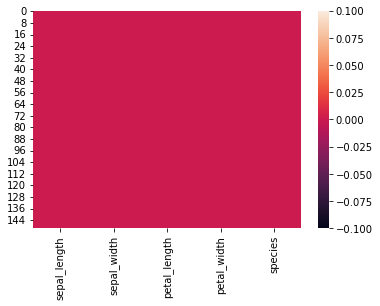

In [64]:
sns.heatmap(df.isnull())

In [65]:
###NO NLL VALUES

In [66]:
df_categorical=df.loc[:,df.dtypes== object]
df_categorical

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [67]:
df_numerical = df.select_dtypes(exclude=[object])
df_numerical

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [68]:
##target variable
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

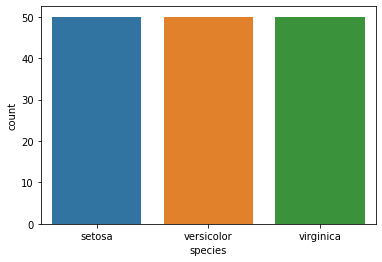

In [69]:
sns.countplot(df['species'])

# Exploratory Data Analysis
#on cont features

<AxesSubplot:>

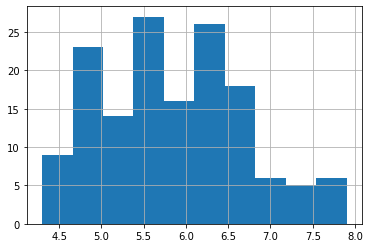

In [70]:
# histograms
df['sepal_length'].hist()

<AxesSubplot:>

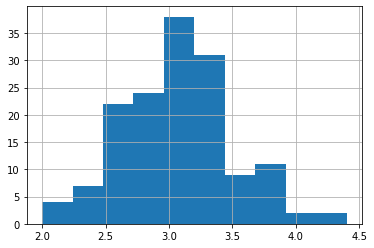

In [71]:
df['sepal_width'].hist()

<AxesSubplot:>

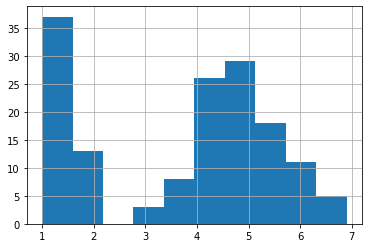

In [72]:
df['petal_length'].hist()

<AxesSubplot:>

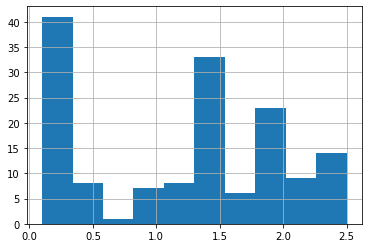

In [73]:
df['petal_width'].hist()

# scatterplot on categorical feature

In [82]:
# Let's see how Sales are related with other variables using scatter plot.
# scatterplot


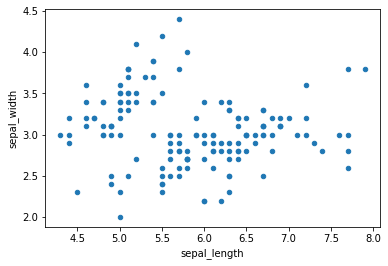

In [89]:
df.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.show()

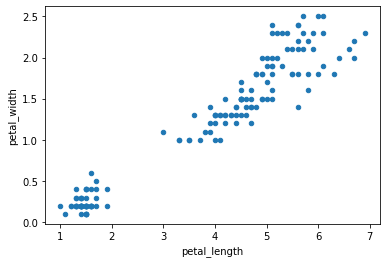

In [91]:
df.plot(kind='scatter',x='petal_length',y='petal_width')
plt.show()

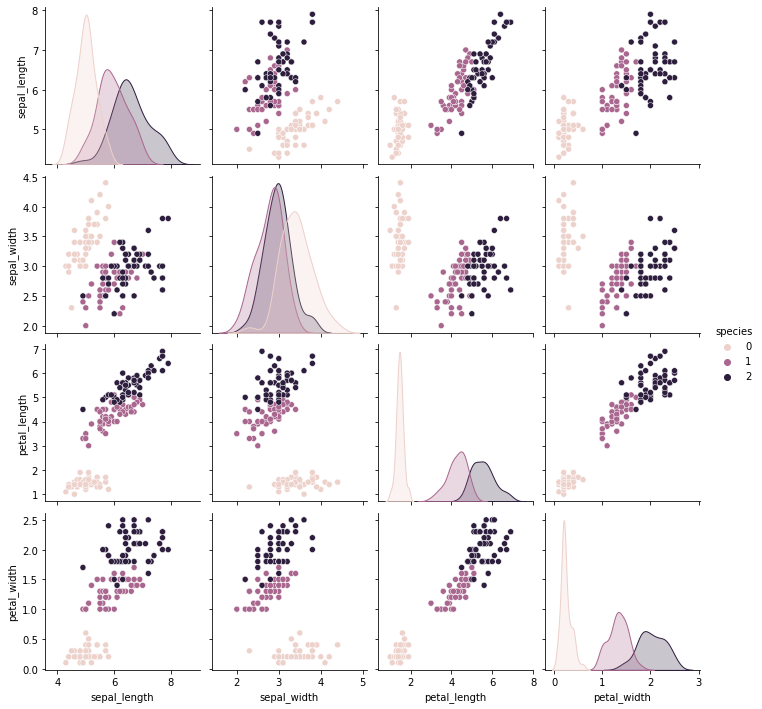

In [163]:
]
sns.pairplot(df,hue='species')

# Coorelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [99]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

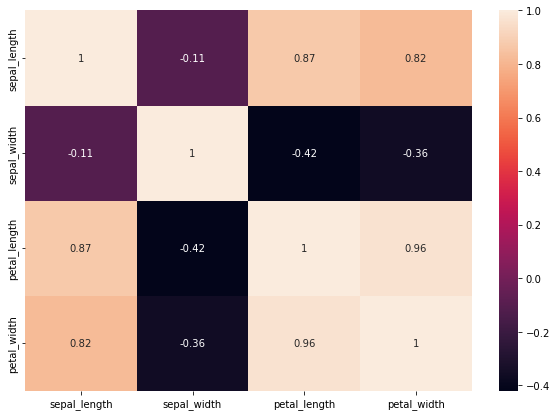

In [100]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)

In [127]:
##petal_length & peteal_width are highly co-related

# Label Encoder
In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [103]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [108]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
x = df.drop(columns=['species'])
y = df['species']


In [109]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [133]:
x_train.shape,x_test.shape

((105, 4), (45, 4))

In [134]:
y_train.shape,y_test.shape

((105,), (45,))

In [110]:
x.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [111]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [112]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [113]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [114]:
##now our model is trained

In [117]:
##lets predict our model
y_pred =model.predict(x_test)

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
accuracy=confusion_matrix(y_test,y_pred)
accuracy

array([[17,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 12]], dtype=int64)

In [123]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9777777777777777

# Evaluation
#We can check precision,recall,f1-score using classification report!

In [124]:
from sklearn.metrics import classification_report

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# CONCLUSION:
The Logistic Regression algorithm gives us the maximum Accuracy (98% approx)

# NON-LINEAR ALGORITHM
#NO PRE-PROCESSING REQUIRED IE; NO ENCODING & FEATURING SCALING IS REQUIRED

# DECISION TREE CLASSIFIER
-->predict the species of flower using DT

In [135]:
# Getting features and target
# train - 70
# test - 30
x = df.drop(columns=['species'])
y = df['species']


In [137]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state=42)

In [189]:
##Importing Packages for Classification algorithms
import sklearn 
from sklearn.tree import DecisionTreeClassifier

In [190]:
##Training
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [191]:
from sklearn import tree 

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini = 

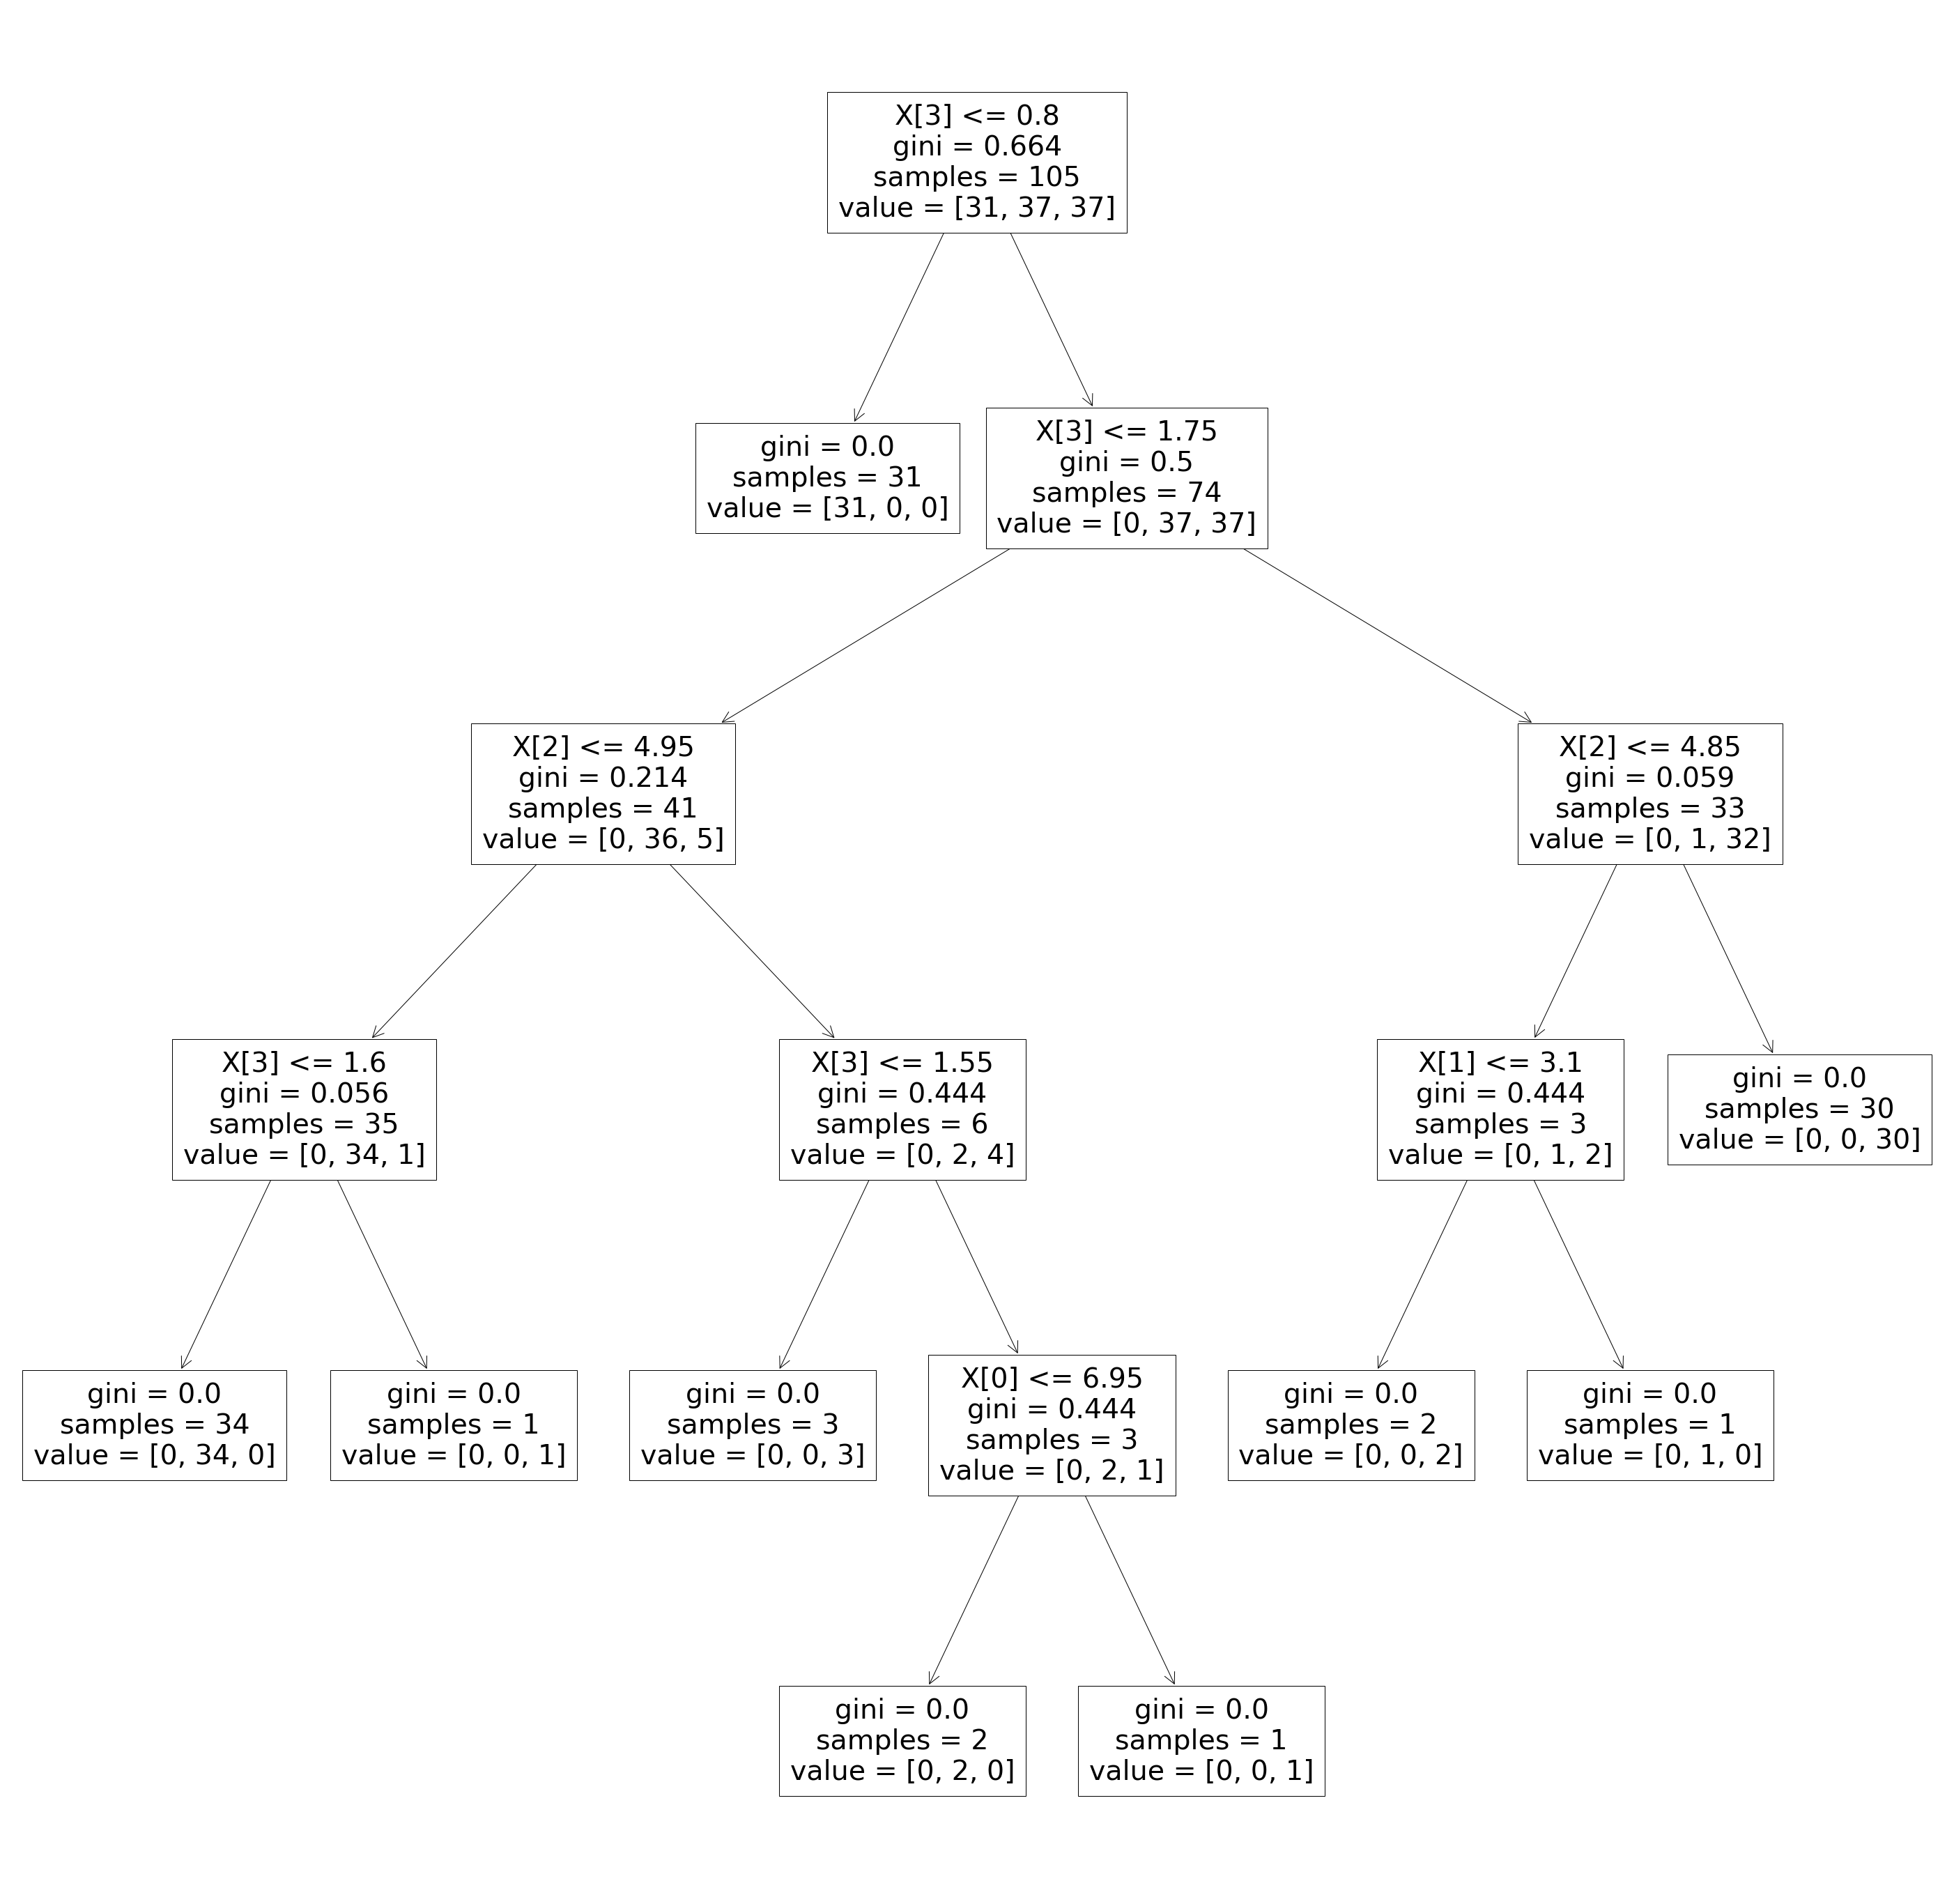

In [192]:
# double click on decision tree to see the tree 
plt.figure(figsize=(50,50))
tree.plot_tree(dt)

it is observed that all nodes are homogenous..!

In [193]:
##lets predict our model
y_pred = dt.predict(x_test)

In [194]:
accuracy=confusion_matrix(y_test,y_pred)
accuracy

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [195]:
accuracy=(accuracy_score(y_test,y_pred)*100)
accuracy

100.0

In [196]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
4      0
32     0
142    2
85     1
86     1
16     0
10     0
Name: species, dtype: int32

In [197]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [198]:
##pred thespecies of new flower
x_new=[[6.3,3.0,1.3,0.2]]

In [199]:
y_pred = dt.predict(x_new)

In [200]:
y_pred

array([0])

array([0])=setosa   
ie the classifier has pred the new flower as setosa

In [219]:
###IMPORTANCE OF VARIABLE
fi=pd.DataFrame({'feature':list(x_train.columns),
                 'importance':dt.feature_importances_}).\
                  sort_values('importance',ascending=False)

In [220]:
fi.head()

,feature,importance
3,petal_width,0.893313
2,petal_length,0.068467
0,sepal_length,0.019110
1,sepal_width,0.019110


# Roc curve

# Random Forest Classifier

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
##create the model with 100 trees
rf=RandomForestClassifier(n_estimators=100,bootstrap=100,max_features='sqrt')

In [175]:
rffit=rf.fit(x_train,y_train)

In [176]:
rffit

RandomForestClassifier(bootstrap=100, max_features='sqrt')

In [177]:
##actual class prediction
y_predRF=rffit.predict(x_test)

In [178]:
len(y_predRF)

45

In [179]:
##prediction
y_predRF


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [180]:
##cross tabulation
accuracy=confusion_matrix(y_test,y_predRF)
accuracy

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [181]:
#cross tabuation
pd.crosstab(y_test,y_predRF,margins=True,
            rownames=["Actuals"],colnames=["predict"])

predict,0,1,2,All
Actuals,,,,
0,19,0,0,19
1,0,13,0,13
2,0,0,13,13
All,19,13,13,45


In [182]:
accuracy=(accuracy_score(y_test,y_predRF)*100)
accuracy


100.0

In [183]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [213]:
##prob
predP_RF=rffit.predict_proba(x_test)[:,1]


In [214]:
predP_RF

array([0.99, 0.02, 0.02, 0.97, 0.91, 0.01, 1.  , 0.08, 0.84, 1.  , 0.1 ,
       0.  , 0.1 , 0.  , 0.  , 0.9 , 0.  , 1.  , 0.99, 0.  , 0.  , 0.11,
       0.  , 0.  , 0.  , 0.01, 0.04, 0.  , 0.  , 0.  , 0.  , 0.02, 0.99,
       0.  , 0.  , 0.07, 0.97, 0.01, 0.  , 0.  , 0.07, 0.92, 0.98, 0.  ,
       0.  ])